In [ ]:
## OVERALL RUN

import subprocess

# files
files = dict()
basepath = "../linux_executable/fortran_files/"
files["energy"] = "Energy_SL.txt"
files["endprog"] = "FimPrograma.txt"
files["oscstrsl"] = "OscStr_SL.txt"
files["oscstrslnorm"] = "OscStr_SL_norm.txt"
files["photocurrentsl"] = "Photocurrent_SL.txt"
files["potentialsl"] = "Potencial_SL.txt"
files["transmission"] = "Transmission_SL.txt"
files["wavefunction"] = "wavefunction_SL.txt"

for f in files:
  files[f] = basepath + files[f]
  print(files[f])

ex1 = [5, 2e-9, 7e-9, 2e-9, 1, 2e-9, 7e-9]

args = " ".join([str(num) for num in ex1])

outputs = " outputs/"

cmd = ["./prog "+str(args)+outputs]

print(cmd)

result = subprocess.run(cmd, capture_output=True, text=True, shell=True)
print(result.stdout)

['./prog 5 2e-09 7e-09 2e-09 1 2e-09 7e-09 outputs/']



In [24]:
import os
import sys # incluir folders no notebook
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

current_dir = os.getcwd()
subfolder_path = os.path.join(current_dir, 'include')
if subfolder_path not in sys.path:
        sys.path.insert(0, subfolder_path)


from extract import (
    _load_photocurrent_file,
    extract_metrics_from_photocurrent,
    _load_photocurrent_file as load_photocurrent,  # alias caso precise
)

# paths - ajuste para o diretório onde estão os outputs do programa
base_dir = Path("../linux_executable/fortran_files")  # ajuste se necessário

paths = {
    "Energy_SL": base_dir / "Energy_SL.txt",
    "FimPrograma": base_dir / "FimPrograma.txt",
    "OscStr_SL": base_dir / "OscStr_SL.txt",
    "Photocurrent_SL": base_dir / "Photocurrent_SL.txt",
    "Transmission_SL": base_dir / "Transmission_SL.txt",
    "Potencial_SL": base_dir / "Potencial_SL.txt",
    "Wavefunction_SL": base_dir / "wavefunction_SL.txt",
}
for k,p in paths.items():
    print(f"{k}: exists? {p.exists()} -> {p}")


Energy_SL: exists? True -> ../linux_executable/fortran_files/Energy_SL.txt
FimPrograma: exists? True -> ../linux_executable/fortran_files/FimPrograma.txt
OscStr_SL: exists? True -> ../linux_executable/fortran_files/OscStr_SL.txt
Photocurrent_SL: exists? True -> ../linux_executable/fortran_files/Photocurrent_SL.txt
Transmission_SL: exists? True -> ../linux_executable/fortran_files/Transmission_SL.txt
Potencial_SL: exists? True -> ../linux_executable/fortran_files/Potencial_SL.txt
Wavefunction_SL: exists? True -> ../linux_executable/fortran_files/wavefunction_SL.txt


In [11]:
def pretty_print(title, d):
    print("─" * 60)
    print(f"{title}")
    print("─" * 60)
    if isinstance(d, dict):
        for k,v in d.items():
            print(f"{k:25s} : {v}")
    else:
        pprint(d)
    print()

def plot_xy(x, y, title="", xlabel="", ylabel="", show=True, figax=None):
    if figax is None:
        fig, ax = plt.subplots(figsize=(8,4))
    else:
        fig, ax = figax
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    if figax is None and show:
        plt.show()
    else:
        return fig, ax

### Plots

────────────────────────────────────────────────────────────
Energy_SL.txt summary
────────────────────────────────────────────────────────────
num_points                : 45
min (eV?)                 : 243.9201459302145
max (eV?)                 : 693.1720151111712
mean                      : 533.0567614727543
median                    : 552.0776050734826



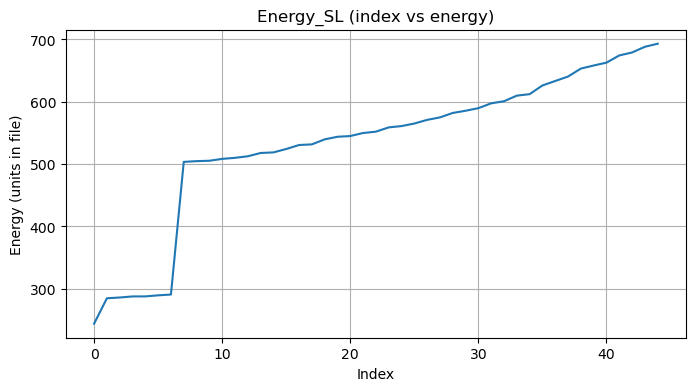

In [16]:
p = paths["Energy_SL"]
if p.exists():
    energy = np.loadtxt(p)
    pretty_print("Energy_SL.txt summary", {
        "num_points": energy.size,
        "min (eV?)": float(np.min(energy)),
        "max (eV?)": float(np.max(energy)),
        "mean": float(np.mean(energy)),
        "median": float(np.median(energy))
    })
    # plot energy vs index
    plot_xy(np.arange(energy.size), energy, title="Energy_SL (index vs energy)", xlabel="Index", ylabel="Energy (units in file)")
else:
    print("Energy_SL.txt not found at", p)

In [17]:
p = paths["FimPrograma"]
if p.exists():
    with open(p, "r") as f:
        text = f.read().strip()
    # tenta converter pra float/int
    try:
        val = float(text)
        pretty_print("FimPrograma.txt value", {"raw": text, "as_float": val})
    except:
        pretty_print("FimPrograma.txt (raw)", {"raw": text})
else:
    print("FimPrograma.txt not found at", p)

────────────────────────────────────────────────────────────
FimPrograma.txt value
────────────────────────────────────────────────────────────
raw                       : 29.320899000000001
as_float                  : 29.320899



────────────────────────────────────────────────────────────
OscStr_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (44, 2)
x min/max                 : (40.84494926412583, 449.25186918095676)
y min/max                 : (4.0390182743024023e-11, 0.35883602926785424)



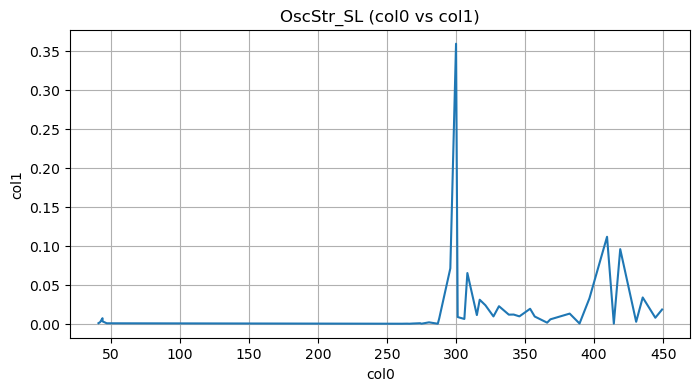

In [18]:
p = paths["OscStr_SL"]
if p.exists():
    data = np.loadtxt(p)
    if data.ndim == 1:
        # apenas uma linha
        x = np.arange(data.size)
        y = data
    else:
        x = data[:,0]
        y = data[:,1]
    pretty_print("OscStr_SL.txt summary", {
        "shape": data.shape,
        "x min/max": (float(np.min(x)), float(np.max(x))),
        "y min/max": (float(np.min(y)), float(np.max(y)))
    })
    plot_xy(x, y, title="OscStr_SL (col0 vs col1)", xlabel="col0", ylabel="col1")
else:
    print("OscStr_SL.txt not found at", p)

────────────────────────────────────────────────────────────
Photocurrent_SL metrics
────────────────────────────────────────────────────────────
num_peaks                 : 3
peak_energy               : 309.6000193186107
peak_value                : 1.551237337323166e-11
peak_area                 : 2.7416318065620792e-11
total_abs_area            : 1.1523405313467517e-10
prominence_ratio          : 0.2379185433456816
Q_factor                  : 206.40000000000018
secondary_peaks_ratio     : 0.13644984965076945
integrated_QE             : 7.380230542361847e-11



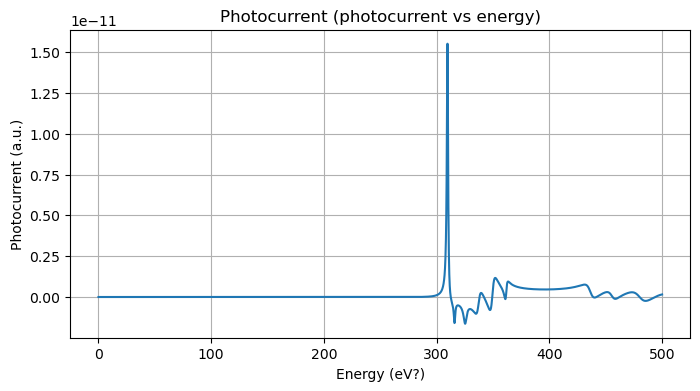

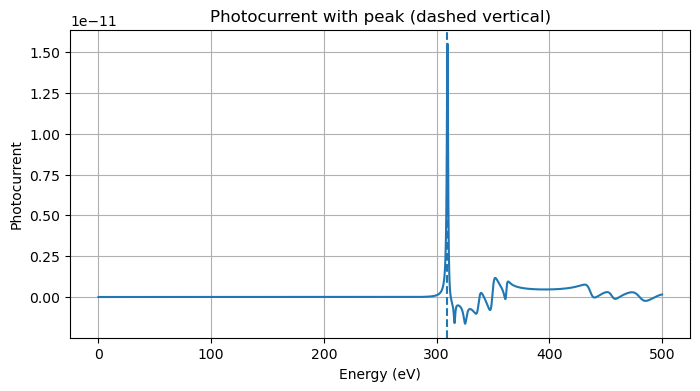

In [25]:
p = paths["Photocurrent_SL"]
if p.exists():
    energy, photocurrent = _load_photocurrent_file(str(p))  # usa a função do extract.py
    metrics = extract_metrics_from_photocurrent(str(p))     # pega todos os indicadores que definimos
    pretty_print("Photocurrent_SL metrics", metrics)
    # plot photocurrent vs energy
    plot_xy(energy, photocurrent, title="Photocurrent (photocurrent vs energy)", xlabel="Energy (eV?)", ylabel="Photocurrent (a.u.)")
    # highlight peak point if exists
    if metrics.get("peak_energy") is not None:
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(energy, photocurrent)
        ax.axvline(metrics["peak_energy"], linestyle="--")
        ax.set_title("Photocurrent with peak (dashed vertical)")
        ax.set_xlabel("Energy (eV)")
        ax.set_ylabel("Photocurrent")
        ax.grid(True)
        plt.show()
else:
    print("Photocurrent_SL.txt not found at", p)

────────────────────────────────────────────────────────────
Transmission_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (4999, 2)
x min/max                 : (0.10000000623986131, 499.90003119306675)
y min/max                 : (2.33889971e-26, 0.999102652)



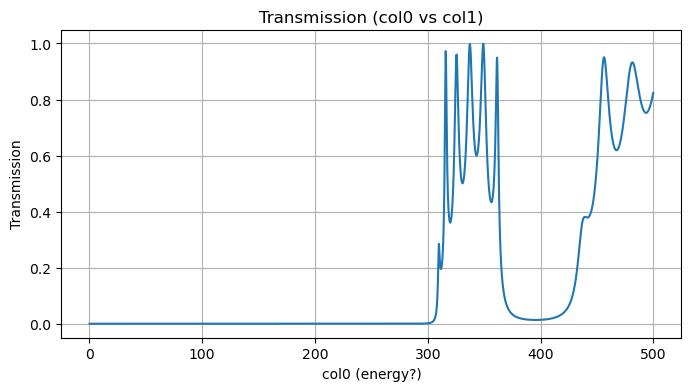

In [26]:
p = paths["Transmission_SL"]
if p.exists():
    data = np.loadtxt(p)
    if data.ndim == 1:
        x = np.arange(data.size)
        y = data
    else:
        x = data[:,0]
        y = data[:,1]
    pretty_print("Transmission_SL.txt summary", {
        "shape": data.shape,
        "x min/max": (float(np.min(x)), float(np.max(x))),
        "y min/max": (float(np.min(y)), float(np.max(y)))
    })
    plot_xy(x, y, title="Transmission (col0 vs col1)", xlabel="col0 (energy?)", ylabel="Transmission")
else:
    print("Transmission_SL.txt not found at", p)

────────────────────────────────────────────────────────────
Potencial_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (1926, 2)
x min/max                 : (-95.0, 97.50000286847353)
y min/max                 : (0.0, 503.0)



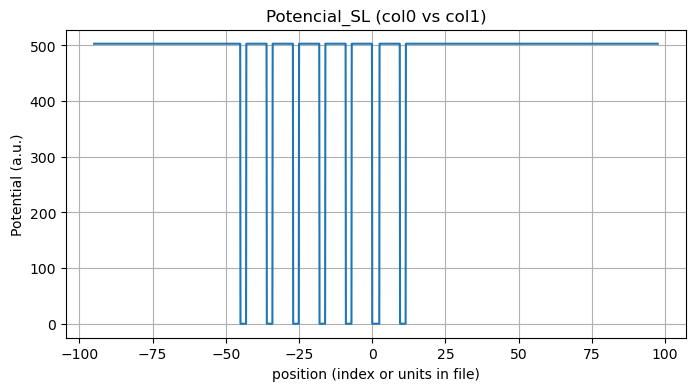

In [27]:
p = paths["Potencial_SL"]
if p.exists():
    data = np.loadtxt(p)
    if data.ndim == 1:
        x = np.arange(data.size)
        y = data
    else:
        x = data[:,0]
        y = data[:,1]
    pretty_print("Potencial_SL.txt summary", {
        "shape": data.shape,
        "x min/max": (float(np.min(x)), float(np.max(x))),
        "y min/max": (float(np.min(y)), float(np.max(y)))
    })
    plot_xy(x, y, title="Potencial_SL (col0 vs col1)", xlabel="position (index or units in file)", ylabel="Potential (a.u.)")
else:
    print("Potencial_SL.txt not found at", p)

────────────────────────────────────────────────────────────
wavefunction_SL.txt summary
────────────────────────────────────────────────────────────
shape                     : (1926, 46)
num_columns               : 46
num_rows                  : 1926



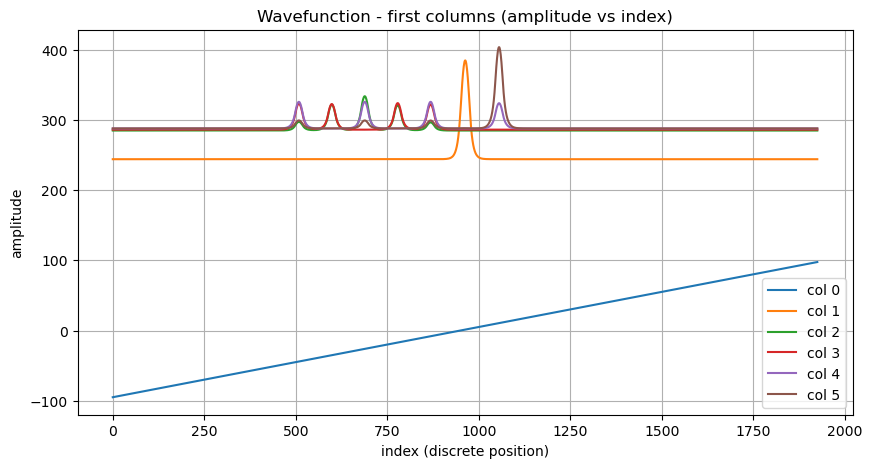

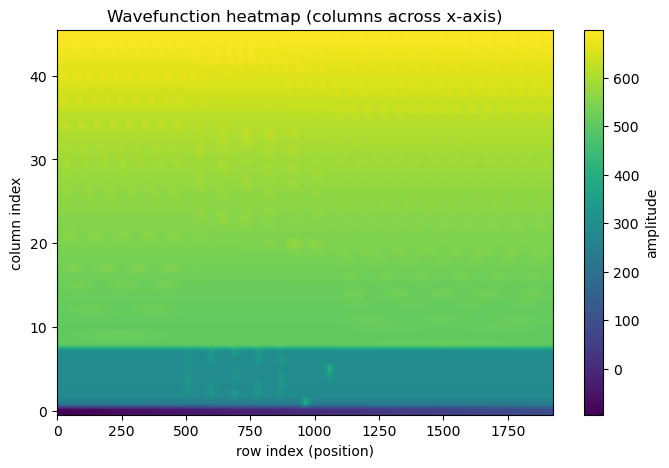

In [28]:
p = paths["Wavefunction_SL"]
if p.exists():
    data = np.loadtxt(p)
    pretty_print("wavefunction_SL.txt summary", {
        "shape": data.shape,
        "num_columns": data.shape[1] if data.ndim>1 else 1,
        "num_rows": data.shape[0] if data.ndim>1 else 1,
    })
    # 1) plot first few columns as line plots (amplitude vs index)
    cols_to_plot = min(6, data.shape[1]) if data.ndim>1 else 1
    fig, ax = plt.subplots(figsize=(10,5))
    x = np.arange(data.shape[0])
    for c in range(cols_to_plot):
        ax.plot(x, data[:,c], label=f"col {c}")
    ax.set_title("Wavefunction - first columns (amplitude vs index)")
    ax.set_xlabel("index (discrete position)")
    ax.set_ylabel("amplitude")
    ax.legend()
    ax.grid(True)
    plt.show()

    # 2) heatmap of the whole matrix (rows x cols) - use imshow
    if data.ndim > 1:
        fig, ax = plt.subplots(figsize=(8,5))
        im = ax.imshow(data.T, aspect='auto', origin='lower')
        ax.set_title("Wavefunction heatmap (columns across x-axis)")
        ax.set_ylabel("column index")
        ax.set_xlabel("row index (position)")
        fig.colorbar(im, ax=ax, label="amplitude")
        plt.show()
else:
    print("wavefunction_SL.txt not found at", p)